Task 1
Part A

In [3]:
import numpy as np
import math
from collections import Counter
import pandas as pd
import heapq
#from nltk.corpus import stopwords
#stop_words = stopwords.words("english") #stop-words list from nltk library

In [2]:
#read the data file
link = 'random_text.txt'
text = open(link, 'r').read().lower()

Converting the text to the list of words-like substrings using regex library, and store them in a Counter with corresponding frequencies.

After that removing the stop words from the list. The list of stop words was taken from python nlkt library

In [3]:
def remove_stop_words(words, stop_words):
    for s in stop_words:
        if words[s]>0:del words[s] #if stop-word in the words list, then removes it
            
import re as regex
words_count = Counter(regex.findall('\w+', text.lower()))
remove_stop_words(words_count, stop_words)
print(len(words_count))

148


Next approach of converting the text to the list of words-like substrings is to go through each character using while loop, and with two pointers ‘left’ and ‘right’, where ‘left’ points to the latest non-alphabetic character, and ‘right’ pointer increases until it reaches the next non-alphabetic character, and adds the substring from left pointer to right pointer to Counter(words_count) as a word. Then, updates the pointer values 'left' and 'right'

In [19]:
def text_to_words(text):
    words_count = Counter([])
    l, r = -1, 0
    while r<len(text):
        if text[r].isalpha():r+=1
        elif r-l==1: l, r = l+1, r+1
        else:
            words_count[text[l+1:r]]+=1 #adds the value between two non-alphabetic characters to the words list
            l, r = r, r+1
    return words_count

words_count2 = text_to_words(text)
remove_stop_words(words_count2, stop_words)
print(len(words_count2))

148


Both approaches give the 148 unique words after removing stop-words

Next step is to find the list of top k frequent words.
I again have used two approaches, one is the ‘nlargest’ function from pandas library

In [33]:
df_count1 = pd.DataFrame.from_dict(words_count, orient='index', columns={'frequency'}).reset_index()
df_count1 = df_count1.rename(columns={'index':'word', 0:'count'})
df_count1 = df_count1.sort_values("word", ascending = True)
top5_pd = df_count1.nlargest(5, 'frequency')
top5_pd

,word,frequency
29,sed,12
12,ante,9
35,eu,9
4,amet,8
7,elit,8


Second one is using python heapq to be able to retrieve the top k elements in O(k*logn) time. However, python heapq is  designed to find top smallest values. That’s why, I created a temporary array storing negative frequencies of words.

As it can be seen below, both methods gives the same results for top frequent words

In [34]:
def top_k_words(words, k):
    heap = [(-count,word) for word,count in words.items()] #temporary array with negative frequency
    heapq.heapify(heap)
    res = {}
    for i in range(k):
        neg_count, word = heapq.heappop(heap) #pops the word with highest negative frequency
        res[word] = -neg_count #adds that word to the result dictionary
    return res

top5 = top_k_words(words_count2, 5)
top5_heap = pd.DataFrame.from_dict(top5, orient='index', columns={'frequency'}).reset_index()
top5_heap = top5_heap.rename(columns={'index':'word', 0:'count'})
top5_heap

,word,frequency
0,sed,12
1,ante,9
2,eu,9
3,amet,8
4,elit,8


This is the graph representation of top 5 frequent words

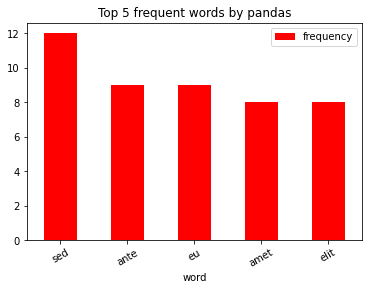

In [35]:
top5_pd_plot = top5_pd.plot.bar(title = 'Top 5 frequent words by pandas',x='word', y='frequency', color='Red',rot=30)

Task 1 Part B

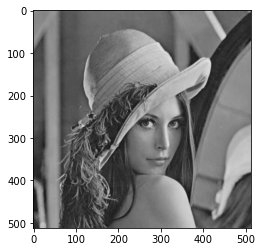

In [2]:
#1B.1. Loading image as grayscale using matplotlib library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('lena_gray.jpeg')
plt.imshow(img, cmap='gray' , vmin =0, vmax=255)

In [37]:
#1B.2. Iniializing an averaging filter
F = np.divide(np.ones([3, 3]), 9)
F

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [38]:
#1B.3. Converting the image into numpy array, and padding the image with 1s on all sides.
data = np.array(img)
l = len(data)
data[0, 0:l] = 1
data[l-1, 0:l] = 1
data[0:l, 0] = 1
data[0:l, l-1] = 1
print(data)

[[  1   1   1 ...   1   1   1]
 [  1 144 144 ... 146 128   1]
 [  1 145 144 ... 149 132   1]
 ...
 [  1  40  43 ...  85  84   1]
 [  1  41  44 ...  87  87   1]
 [  1   1   1 ...   1   1   1]]


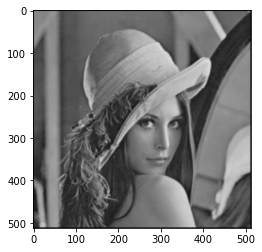

In [39]:
#1B.4. Convolving the filter over the image using function BlurImage
def blurImage(data):
    l = len(data)
    for i in range(1, l-1):
        for j in range(1, l-1):
            data[i,j] = np.sum(data[i-1:i+2,j-1:j+2]*F)

blurImage(data)
plt.imshow(data, cmap='gray' , vmin =0, vmax=255)

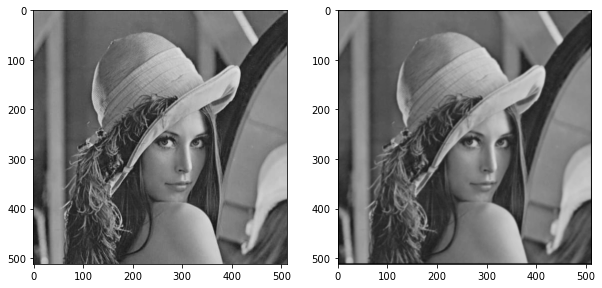

In [40]:
#1B.5. Plotting the original and blurred images side by side
fig = plt.figure(figsize=(10, 7))
  
# showing original image
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray' , vmin =0, vmax=255)

# showing blurred image
fig.add_subplot(1, 2, 2)
plt.imshow(data, cmap='gray' , vmin =0, vmax=255)

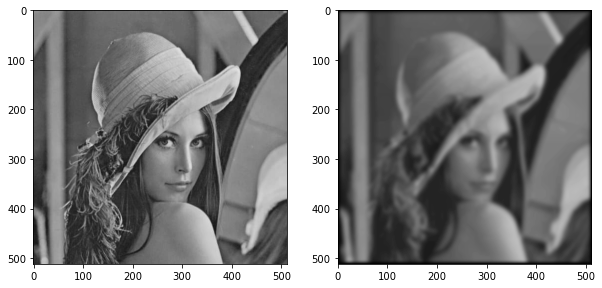

In [41]:
#1B.6. Applying the filter multiple times
for i in range(15):
    blurImage(data)
    
fig = plt.figure(figsize=(10, 7))

# showing original image
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray' , vmin =0, vmax=255)

# showing many times blurred image
fig.add_subplot(1, 2, 2)
plt.imshow(data, cmap='gray' , vmin =0, vmax=255)

Task 2

In [96]:
#2.1. Generating simple matrix X
mean, std, N = 2, 0.01, 100
col1 = np.ones(N)
col2 = np.random.normal(mean, std, size = (N,9))
X = np.column_stack((col1,col2))

In [97]:
#2.2. Generating target vector Y
Y = np.random.uniform(0,5,N)

In [4]:
X = np.array([[1, 1], [1, 2], [1, 3]])
Y = np.array([3, 4, 6])

In [8]:
teta = [0, 0]
r = 0.01

In [9]:
def lossFunc(X, Y, teta):
    L = 0
    diff = np.zeros(len(Y))
    Y_PRED = np.zeros(len(Y))
    for i in range(len(Y)):
        for j in range(len(teta)):
            Y_PRED[i]+=X[i,j]*teta[j]
        L+=pow(Y[i]-Y_PRED[i], 2)
    return (L/len(Y), Y_PRED)

L, Y_PRED = lossFunc(X, Y, teta)
            

In [10]:
def grad(teta, r):
    t1 = (28*teta[0]+12*teta[1]-58)/3
    t2 = (12*teta[0]+6*teta[1]-26)/3
    return [teta[0]-r*t1, teta[1]-r*t2]


In [11]:
print(teta)
print(L)
for i in range(500):
    teta = np.subtract(teta, r*((-2/len(Y))*np.matmul(X.transpose(), np.subtract(Y_PRED, Y))))
    print(teta)
    L, Y_PRED = lossFunc(X, Y, teta)
    print('Loss val: ',L)
    print('teta: ',teta)
    

[0, 0]
20.333333333333332
[-0.08666667 -0.19333333]
Loss val:  25.071185185185186
teta:  [-0.08666667 -0.19333333]
[-0.1828     -0.40817778]
Loss val:  30.91842159341564
teta:  [-0.1828     -0.40817778]
[-0.28944978 -0.6469197 ]
Loss val:  38.13482039163011
teta:  [-0.28944978 -0.6469197 ]
[-0.40778223 -0.9122102 ]
Loss val:  47.040990064275384
teta:  [-0.40778223 -0.9122102 ]
[-0.53909295 -1.20699444]
Loss val:  58.03261410344277
teta:  [-0.53909295 -1.20699444]
[-0.68482125 -1.53454431]
Loss val:  71.59803088317754
teta:  [-0.68482125 -1.53454431]
[-0.84656611 -1.89849463]
Loss val:  88.33993010987082
teta:  [-0.84656611 -1.89849463]
[-1.02610389 -2.30288344]
Loss val:  109.00212980321567
teta:  [-1.02610389 -2.30288344]
[-1.22540797 -2.75219671]
Loss val:  134.50262348577914
teta:  [-1.22540797 -2.75219671]
[-1.44667067 -3.25141806]
Loss val:  165.9743658391739
teta:  [-1.44667067 -3.25141806]
[-1.69232747 -3.8060839 ]
Loss val:  204.81560889817692
teta:  [-1.69232747 -3.8060839 ]
[

[-32778803.6655854  -74513924.62382208]
Loss val:  3.675521074342681e+16
teta:  [-32778803.6655854  -74513924.62382208]
[-36414936.81051666 -82779709.92866889]
Loss val:  4.5361962917980584e+16
teta:  [-36414936.81051666 -82779709.92866889]
[-40454424.03054042 -91962413.85443199]
Loss val:  5.5984107780969256e+16
teta:  [-40454424.03054042 -91962413.85443199]
[-4.49420092e+07 -1.02163750e+08]
Loss val:  6.909357802038236e+16
teta:  [-4.49420092e+07 -1.02163750e+08]
[-4.99273994e+07 -1.13496713e+08]
Loss val:  8.527281603443659e+16
teta:  [-4.99273994e+07 -1.13496713e+08]
[-5.54658160e+07 -1.26086836e+08]
Loss val:  1.05240651342413e+17
teta:  [-5.54658160e+07 -1.26086836e+08]
[-6.16186059e+07 -1.40073574e+08]
Loss val:  1.2988423755704939e+17
teta:  [-6.16186059e+07 -1.40073574e+08]
[-6.84539210e+07 -1.55611852e+08]
Loss val:  1.6029846785048643e+17
teta:  [-6.84539210e+07 -1.55611852e+08]
[-7.60474736e+07 -1.72873782e+08]
Loss val:  1.9783462010874944e+17
teta:  [-7.60474736e+07 -1.72

Loss val:  8.338193294326686e+32
teta:  [-4.93707388e+15 -1.12231294e+16]
[-5.48474053e+15 -1.24681044e+16]
Loss val:  1.0290699124554583e+33
teta:  [-5.48474053e+15 -1.24681044e+16]
[-6.09315952e+15 -1.38511838e+16]
Loss val:  1.2700411795941679e+33
teta:  [-6.09315952e+15 -1.38511838e+16]
[-6.76907006e+15 -1.53876873e+16]
Loss val:  1.5674392753512384e+33
teta:  [-6.76907006e+15 -1.53876873e+16]
[-7.51995896e+15 -1.70946343e+16]
Loss val:  1.934477339308547e+33
teta:  [-7.51995896e+15 -1.70946343e+16]
[-8.35414351e+15 -1.89909318e+16]
Loss val:  2.3874625544646435e+33
teta:  [-8.35414351e+15 -1.89909318e+16]
[-9.28086365e+15 -2.10975845e+16]
Loss val:  2.94652066123877e+33
teta:  [-9.28086365e+15 -2.10975845e+16]
[-1.03103843e+16 -2.34379270e+16]
Loss val:  3.636490126670816e+33
teta:  [-1.03103843e+16 -2.34379270e+16]
[-1.14541091e+16 -2.60378822e+16]
Loss val:  4.4880256959795766e+33
teta:  [-1.14541091e+16 -2.60378822e+16]
[-1.27247065e+16 -2.89262489e+16]
Loss val:  5.53896035631

Loss val:  2.253676081208334e+46
teta:  [-2.56672532e+22 -5.83476996e+22]
[-2.85145062e+22 -6.48201750e+22]
Loss val:  2.781406194037262e+46
teta:  [-2.85145062e+22 -6.48201750e+22]
[-3.16776034e+22 -7.20106382e+22]
Loss val:  3.432711772883077e+46
teta:  [-3.16776034e+22 -7.20106382e+22]
[-3.51915810e+22 -7.99987353e+22]
Loss val:  4.236529760001038e+46
teta:  [-3.51915810e+22 -7.99987353e+22]
[-3.90953620e+22 -8.88729471e+22]
Loss val:  5.228573091733849e+46
teta:  [-3.90953620e+22 -8.88729471e+22]
[-4.34321871e+22 -9.87315700e+22]
Loss val:  6.452917393314039e+46
teta:  [-4.34321871e+22 -9.87315700e+22]
[-4.82500937e+22 -1.09683804e+23]
Loss val:  7.96395922068416e+46
teta:  [-4.82500937e+22 -1.09683804e+23]
[-5.36024477e+22 -1.21850963e+23]
Loss val:  9.828832852321251e+46
teta:  [-5.36024477e+22 -1.21850963e+23]


In [3]:
#2.3. Learning the values of b0 and b1 using Least Squares Estimates
def learn_simple_linreg(X, Y):
    x_mean, y_mean = X[:,1].mean(), Y.mean()
    num = denum = 0
    for i in range(len(Y)):
        c = X[i][1]-x_mean
        num+=(c*(Y[i]-y_mean))
        denum+=(c*c)
    b1 = num/denum
    b0 = y_mean - (b1*x_mean)
    return b0, b1

b0, b1 = learn_simple_linreg(X, Y)
print(b0, b1)

1.333333333333333 1.5


In [98]:
#2.4. Calculating the values of b0 and b1 according to the given
#formula Beta = (X^T . X )^(-1) .( X^T . Y)
from numpy.linalg import inv

def findInverse(A):
    det = A[0,0]*A[1,1]-A[0,1]*A[1,0]
    return np.divide(np.array([[A[1,1], -A[0,1]],[-A[1,0], A[0,0]]]), det)

c = np.matmul(X.T, X)
d = np.matmul(X.T, Y)
b = np.matmul(inv(c), d)
print(b)

[ 28.52834203 -19.48569158 -10.30539927  -9.90308292  42.75507716
  34.01614543  -7.17934909   2.65377415 -26.57706337 -18.9137027 ]


In [13]:
#2.5. Calculating the values of Y according to learnt model
def predict_simple_linreg(X, Y, b):
    y_pred = np.zeros(len(Y))
    for i in range(len(Y)):
        y_pred[i] = b[0]+b[1]*X[i,1]
    return y_pred

y_pred = predict_simple_linreg(X, Y, b)
print(y_pred)

[2.83333333 4.16666667 5.5       ]


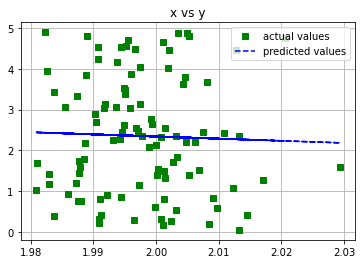

In [47]:
#2.6. Plotting Y actual vs Y predicted
def plot_line_graph(X, Y, y_pred,mean,std):
    plt.plot(X[:,1], Y, 'gs', label='actual values')
    plt.plot(X[:,1], y_pred, 'b--', label='predicted values')
    plt.title('x vs y')
    plt.grid()
    plt.legend()
    plt.show()
    
plot_line_graph(X, Y, y_pred,mean,std)

In [45]:
mean, std, N = 2, 0.01, 100
col1 = np.ones(N)
col2 = np.random.randint(10, size = (N,10))
X = np.column_stack((col1,col2))
Y = np.random.randint(0,5,N)

In [46]:
#2.7. Calculating values of b0 and b1 from existing numpy library
b0_lst = np.linalg.lstsq(X, Y, rcond = True)[0]
print(b0_lst)

[ 2.52469301  0.03684449  0.03064058 -0.01528458  0.00737624 -0.01997719
 -0.05030609 -0.02480491 -0.03186806 -0.01976689 -0.03204796]


In [31]:
from numpy.linalg import inv

def findInverse(A):
    det = A[0,0]*A[1,1]-A[0,1]*A[1,0]
    return np.divide(np.array([[A[1,1], -A[0,1]],[-A[1,0], A[0,0]]]), det)

c = np.matmul(X.T, X)
d = np.matmul(X.T, Y)
b = np.matmul(inv(c), d)
print(b)

[1.33333333 1.5       ]


In [21]:
print(inv(c))

[[ 2.33333333 -1.        ]
 [-1.          0.5       ]]


In [47]:
def Gaussian(X):
    for k in range(len(X[0]-1)):
        for i in range(k+1, len(X)):
            X[i,k]=X[i,k]/X[k,k]
            for j in range(k+1, len(X[0])):
                X[i,j]=X[i,j] - (X[i,k]*X[k,j])        

def Forward(X, Y):
    for k in range(len(X[0]-1)):
        for i in range(k+1, len(X)):
            Y[i]-=(X[i,k]*Y[k])
            
def Backward(X, Y):
    b = np.zeros(len(X[0]))
    for i in reversed(range(len(X[0]))):
        s = Y[i]
        for j in range(i+1, len(X[0])):
            s-=(X[i,j]*b[j])
        b[i] = s/X[i,i]
    return b

In [48]:
c = np.matmul(X.T, X)
d = np.matmul(X.T, Y)
Gaussian(c)
Forward(c, d)
print(Backward(c, d))


[ 2.52469301  0.03684449  0.03064058 -0.01528458  0.00737624 -0.01997719
 -0.05030609 -0.02480491 -0.03186806 -0.01976689 -0.03204796]


In [17]:
#read the data file
link = 'store.csv'
store = pd.read_csv(link)  

In [18]:
print(store)

      Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0        

In [1]:
df_store = pd.DataFrame(pd.read_fwf('store.csv'))
df_store

NameError: name 'pd' is not defined

In [54]:
df_train = pd.DataFrame(pd.read_csv('train.csv'))
df_train

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [55]:
df_train['Sales'].max()
df_train.loc[df_train['Sales'].astype(int).max()][['Store', 'Date', 'Sales']]

Store           297
Date     2015-06-24
Sales          5244
Name: 41551, dtype: object

In [51]:
df_store.loc[df_store['CompetitionDistance'].notnull().astype(int).max()]

Store                                      2
StoreType                                  a
Assortment                                 a
CompetitionDistance                      570
CompetitionOpenSinceMonth                 11
CompetitionOpenSinceYear                2007
Promo2                                     1
Promo2SinceWeek                           13
Promo2SinceYear                         2010
PromoInterval                Jan,Apr,Jul,Oct
Name: 1, dtype: object

In [79]:
df_store['CompetitionDistance'].min()

20.0

In [111]:
df_train[(df_train['Store'] == 2) & (df_train['Promo'] == True) & (df_train['Open'] == True)]
#df_store[df_store['CompetitionDistance']==20]
df_train_sorted = df_train.sort_values(["Store", "Date"], ascending = (True, True))
df_train_sorted

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016095,1,2,2013-01-01,0,0,0,0,a,1
1014980,1,3,2013-01-02,5530,668,1,0,0,1
1013865,1,4,2013-01-03,4327,578,1,0,0,1
1012750,1,5,2013-01-04,4486,619,1,0,0,1
1011635,1,6,2013-01-05,4997,635,1,0,0,1
...,...,...,...,...,...,...,...,...,...
5574,1115,1,2015-07-27,10712,608,1,1,0,1
4459,1115,2,2015-07-28,8093,500,1,1,0,1
3344,1115,3,2015-07-29,7661,473,1,1,0,1
2229,1115,4,2015-07-30,8405,502,1,1,0,1


In [114]:
df = df_train_sorted.iloc[:100000]
while i<len(df):
    curr_store = df.iloc[i]['Store']
    while curr_store == df.iloc[i]['Store']:
        curr_date = df.iloc[i]['Date']
        while df.iloc[i]['Promo']==True:
            i+=1
            print(i)
        i+=1
        print(i)
df       

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016095,1,2,2013-01-01,0,0,0,0,a,1
1014980,1,3,2013-01-02,5530,668,1,0,0,1
1013865,1,4,2013-01-03,4327,578,1,0,0,1
1012750,1,5,2013-01-04,4486,619,1,0,0,1
1011635,1,6,2013-01-05,4997,635,1,0,0,1
...,...,...,...,...,...,...,...,...,...
520029,110,6,2014-03-22,2469,328,1,0,0,0
518914,110,7,2014-03-23,0,0,0,0,0,0
517799,110,1,2014-03-24,4065,580,1,0,0,0
516684,110,2,2014-03-25,3794,537,1,0,0,0


In [71]:
df_train.iloc[df_train['Sales'].agg(pd.Series.idxmax)][['Store', 'Date', 'Sales']]

Store           909
Date     2015-06-22
Sales         41551
Name: 44393, dtype: object

In [80]:
df_store.loc[df_store['CompetitionDistance'].agg(pd.Series.idxmax)]

Store                          453
StoreType                        a
Assortment                       c
CompetitionDistance          75860
CompetitionOpenSinceMonth      NaN
CompetitionOpenSinceYear       NaN
Promo2                           0
Promo2SinceWeek                NaN
Promo2SinceYear                NaN
PromoInterval                  NaN
Name: 452, dtype: object

In [81]:
df_store.loc[df_store['CompetitionDistance'].agg(pd.Series.idxmin)]

Store                                     516
StoreType                                   a
Assortment                                  c
CompetitionDistance                        20
CompetitionOpenSinceMonth                 NaN
CompetitionOpenSinceYear                  NaN
Promo2                                      1
Promo2SinceWeek                            35
Promo2SinceYear                          2010
PromoInterval                Mar,Jun,Sept,Dec
Name: 515, dtype: object

In [234]:
table = pd.pivot_table(df_train, values='Sales', index=['Store'],
                    columns=['Date'])
table = table.dropna()

In [247]:
Y_train.to_numpy()[:,41]

array([ 5263.,  6064.,  8314., 13995.,  4822.,  5651., 15344.,  8492.,
        8565.,  7185., 10457.,  8959.,  6544.,  9191., 10231.,  8430.,
       10071.,  8234.,  9515.,  7273., 14190., 14180.,  7818., 13213.,
        7301.,  9411.,  4776.,  7248., 10789., 11144., 12412.,  9091.,
        7434.,  8336.,  5464., 11946.,  8096.,  6670.,  6301.,  9379.,
        3874., 10310.,  5729.,  7540., 10732.,  6096., 10022., 11594.,
        7148.,  9762.,  5572.,  7495., 11525., 13251.,  7156.,  8306.,
       11035., 11187., 11204.,  8613., 11545.,  6026.,  7518.,  7444.,
       10335.,  5712.,  7150.,  9810., 11492.,  3866., 14949.,  7791.,
        5572.,  6379.,  7863., 11495.,  6164.,  8227.,  6548.,  8372.,
        8445.,  6370.,  8380.,  7012., 11075., 12602.,  5425., 10483.,
        6456., 10845.,  9194.,  9013.,  6058.,  8897.,  7834.,  5750.,
        8083.,  4487., 10779.,  7038., 10392.,  4565., 12336., 10750.,
        7464., 18227.,  8742.,  9581.,  5404.,  5291.,  8519.,  4872.,
      

In [235]:
trainset = table.iloc[:800]
testset = table.iloc[800:]

X_train, Y_train = trainset.iloc[:, :900], trainset.iloc[:, 900:]
X_test, Y_test = testset.iloc[:, :900], trainset.iloc[:, 900:]
Y_train

Date,2015-06-20,2015-06-21,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-27,2015-06-28,2015-06-29,...,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31
Store,,,,,,,,,,,,,,,,,,,,,
1,4097.0,0.0,3846.0,3762.0,3346.0,3533.0,3317.0,4019.0,0.0,5197.0,...,3464.0,3769.0,3706.0,4364.0,0.0,6102.0,5011.0,4782.0,5020.0,5263.0
2,3020.0,0.0,4123.0,4094.0,4805.0,4022.0,3953.0,2404.0,0.0,7961.0,...,5093.0,4108.0,3854.0,2512.0,0.0,6627.0,5671.0,6402.0,5567.0,6064.0
3,3891.0,0.0,5840.0,6757.0,5448.0,5763.0,6222.0,5156.0,0.0,10243.0,...,5414.0,5702.0,5080.0,3878.0,0.0,8107.0,8864.0,7610.0,8977.0,8314.0
4,9374.0,0.0,9118.0,7635.0,8048.0,7111.0,7684.0,8989.0,0.0,11692.0,...,8503.0,7286.0,8322.0,9322.0,0.0,11812.0,10275.0,10514.0,10387.0,13995.0
5,2088.0,0.0,3827.0,3697.0,4134.0,3325.0,3799.0,1876.0,0.0,7623.0,...,3595.0,3713.0,3815.0,2030.0,0.0,7059.0,6083.0,5899.0,4943.0,4822.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,5804.0,0.0,4622.0,4765.0,6069.0,5121.0,5276.0,6532.0,0.0,11827.0,...,5164.0,5762.0,4406.0,3913.0,0.0,8380.0,7602.0,7395.0,6615.0,8916.0
955,4381.0,0.0,3994.0,3320.0,3653.0,4175.0,4584.0,4704.0,0.0,7654.0,...,3855.0,3844.0,4336.0,4028.0,0.0,7599.0,5120.0,5161.0,5416.0,6851.0
956,1646.0,0.0,2822.0,2890.0,3054.0,2805.0,2723.0,1812.0,0.0,6030.0,...,2518.0,2495.0,2114.0,904.0,0.0,3790.0,3751.0,3172.0,3894.0,4833.0


In [268]:
from numpy.linalg import inv
X = X_train.to_numpy()
Y = Y_train.to_numpy()

for i in range(len(Y[0])):
    c = np.matmul(X.T, X)
    d = np.matmul(X.T, Y[:,i])
    b = np.matmul(inv(c), d)
    #print(np.matmul(X[10], b))
    #print(Y[10,i])

In [263]:
print(np.matmul(X[10], b))
print(Y[10])

[-23206.24395719 -42061.25535319 -28614.42924291 -26280.65468811
 -26230.2360355  -25992.89704618 -28637.13709268 -24037.47021425
 -43277.16748128 -33294.80813592 -33745.12986497 -33130.33624803
 -34001.15723485 -35093.92084304 -25385.74738144 -44292.13622301
 -30745.88579617 -27136.31995904 -28283.94350701 -28038.95607381
 -28955.27996006 -24782.28989108 -45346.3851136  -32851.34302164
 -31732.16141797 -30146.30313389 -31162.35876506 -32422.05373254
 -26401.74328049 -47167.97730227 -28474.35125482 -26959.64456439
 -25700.83762444 -27694.6104005  -28644.39504274 -24577.15117982
 -45655.17239473 -34350.72523576 -32946.66826857 -30273.64392444
 -32386.88903949 -34703.45015987]
[ 5293.     0.  6155.  6003.  5702.  6012.  6102.  6001.     0. 11296.
 11706.  9599.  7961.  7689.  5372.     0.  7135.  6620.  6907.  6595.
  6979.  5756.     0. 10434.  9319.  9645.  8149.  7757.  5740.     0.
  7733.  6315.  7185.  6151.  6192.  4712.     0.  8796.  6938.  8378.
  7361. 10457.]


In [254]:
bl = np.linalg.lstsq(X, Y, rcond = True)[0]
print(bl)

[-2.66879446e-01 -3.34785579e-01  9.83156165e-03 -2.98173125e-02
 -4.27999195e-01  9.75431183e-02  8.24002176e-02 -6.83990877e-01
  7.05842794e-01 -6.15162486e-01 -2.23667460e-01  6.63222800e-01
  3.21147321e-01  9.47959327e-02  2.32807888e-01 -3.67050689e-01
  3.14624441e-01 -6.08823579e-01  3.62111057e-01 -1.51041000e-01
 -6.76434588e-02  2.56683875e-01  4.13540861e-01 -1.58707810e-01
 -2.46140941e-01 -2.39632830e-01 -4.10003844e-01  1.28308638e-01
  6.43418430e-01 -6.98214894e-01  7.97278898e-01 -2.37269144e-01
 -3.39522947e-01 -5.43384101e-01  3.82827677e-01  2.96755165e-01
 -4.43752529e-02 -1.58658534e-01  4.51025519e-01  1.29701421e-01
 -8.11978923e-01  6.75006900e-01  3.57835607e-01 -2.06653466e-01
  7.26892226e-02  2.94949126e-01  4.21570022e-01  2.14959122e-01
 -2.66000774e-01 -3.01190491e-02  1.32634788e-01 -2.63297814e-01
  2.12866325e-01 -7.53925759e-01 -6.87210398e-01  3.24017665e-01
 -1.61626038e-01 -9.31900757e-01  3.03177638e-01  5.25567041e-01
 -6.25676383e-02  1.41135